## 问题描述
一、数据说明： Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的共享单车数据。数据包含每天的日期、天气等信息，需要预测每天的共享单车骑行量。
## 解题提示
原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset 

1) 文件说明 
day.csv: 按天计的单车共享次数（作业只需使用该文件） 
hour.csv: 按小时计的单车共享次数（无需理会） 
readme：数据说明文件 

2) 字段说明 
Instant记录号 
Dteday：日期 
Season：季节（1=春天、2=夏天、3=秋天、4=冬天） 
yr：年份，(0: 2011, 1:2012) 
mnth：月份( 1 to 12) 
hr：小时 (0 to 23) （只在hour.csv有，作业忽略此字段） 
holiday：是否是节假日（0/1） 
weekday：星期中的哪天，取值为0～6 
workingday：是否工作日（0/1） 
1=工作日 （是否为工作日，1为工作日，0为非周末或节假日） 
weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾） 
temp：气温摄氏度 
atemp：体感温度 
hum：湿度 
windspeed：风速 
casual：非注册用户贡献的骑行量（作业无需理会该字段） 
registered：注册用户贡献的骑行量（作业无需理会该字段） 
cnt：给定日期（天, day.csv）时间（每小时,hour.csv）总租车人数，响应变量y 

casual、registered和cnt三个特征均为要预测的y（cnt =casual+registered ），作业里只需对cnt进行预测。 
## 批改标准
1. 对数据做数据探索分析（可参考EDA_BikeSharing.ipynb，不计分） 
2. 适当的特征工程（可参考FE_BikeSharing.ipynb，不计分） 
3. 对全体数据，随机选择其中80%做训练数据，剩下20%为测试数据，评价指标为RMSE。（10分） 
4. 用训练数据训练最小二乘线性回归模型（20分）、岭回归模型、Lasso模型，其中岭回归模型（30分）和Lasso模型（30分），注意岭回归模型和Lasso模型的正则超参数调优。 
5. 比较用上述三种模型得到的各特征的系数，以及各模型在测试集上的性能。并简单说明原因。（10分） 


## 解题思路及步骤
1. 首先探索数据
2. 做特征工程
3. 训练模型；
4. 评价模型；

In [ ]:
# 引入工具包和模块
import pandas as pd
import numpy as np

# 图表
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize':'x-large',
          'figure.figsize':(30, 10),
          'axes.titlesize':'x-large',
          'axes.labelsize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
    
}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 800

#
from IPython.display import display, HTML

## 读入数据

In [6]:
train = pd.read_csv("../dataset/day.csv")
train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
train.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 数据探索

In [10]:
train.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


共731个数据,没有空值,除了dteday是object类型,其他都是数值型；

### 1. 离散特征值分布情况

In [11]:
# 观察类别型特征取值范围和直方图
categorical_features = ['season', 'mnth', 'weekday', 'weathersit']
for col in categorical_features:
    print "\n%s属性的不同取值和出现次数" % col
    print train[col].value_counts()
    train[col] = train[col].astype('object')


season属性的不同取值和出现次数
3    188
2    184
1    181
4    178
Name: season, dtype: int64

mnth属性的不同取值和出现次数
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

weekday属性的不同取值和出现次数
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

weathersit属性的不同取值和出现次数
1    463
2    247
3     21
Name: weathersit, dtype: int64


### 2.数值特征分布情况

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c11d8c550>,
      dtype=object)

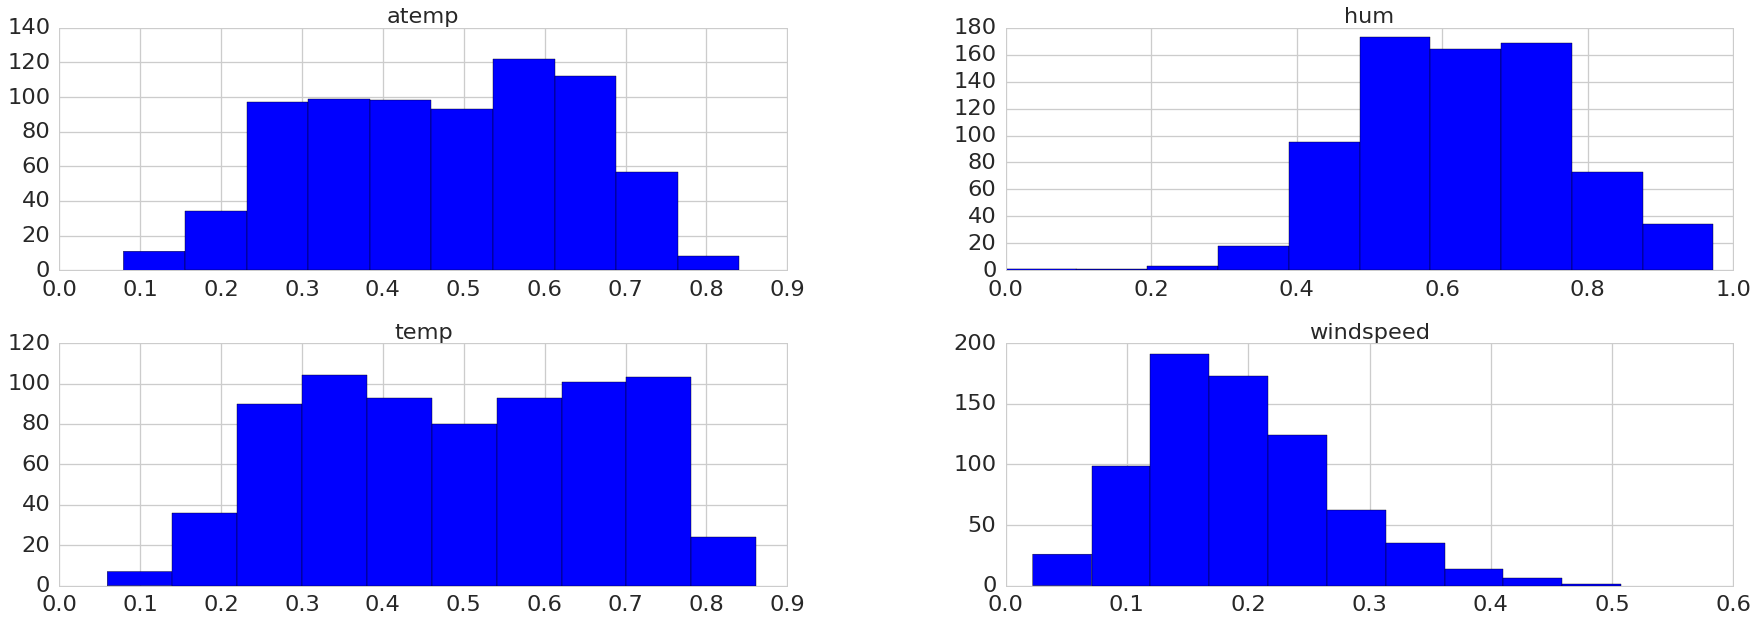

In [12]:
# 数值型特征直方图
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
train[numerical_features].hist()

### 3. 特征值与目标之间的关系

#### 3.1 每年骑行量分布
violinplot

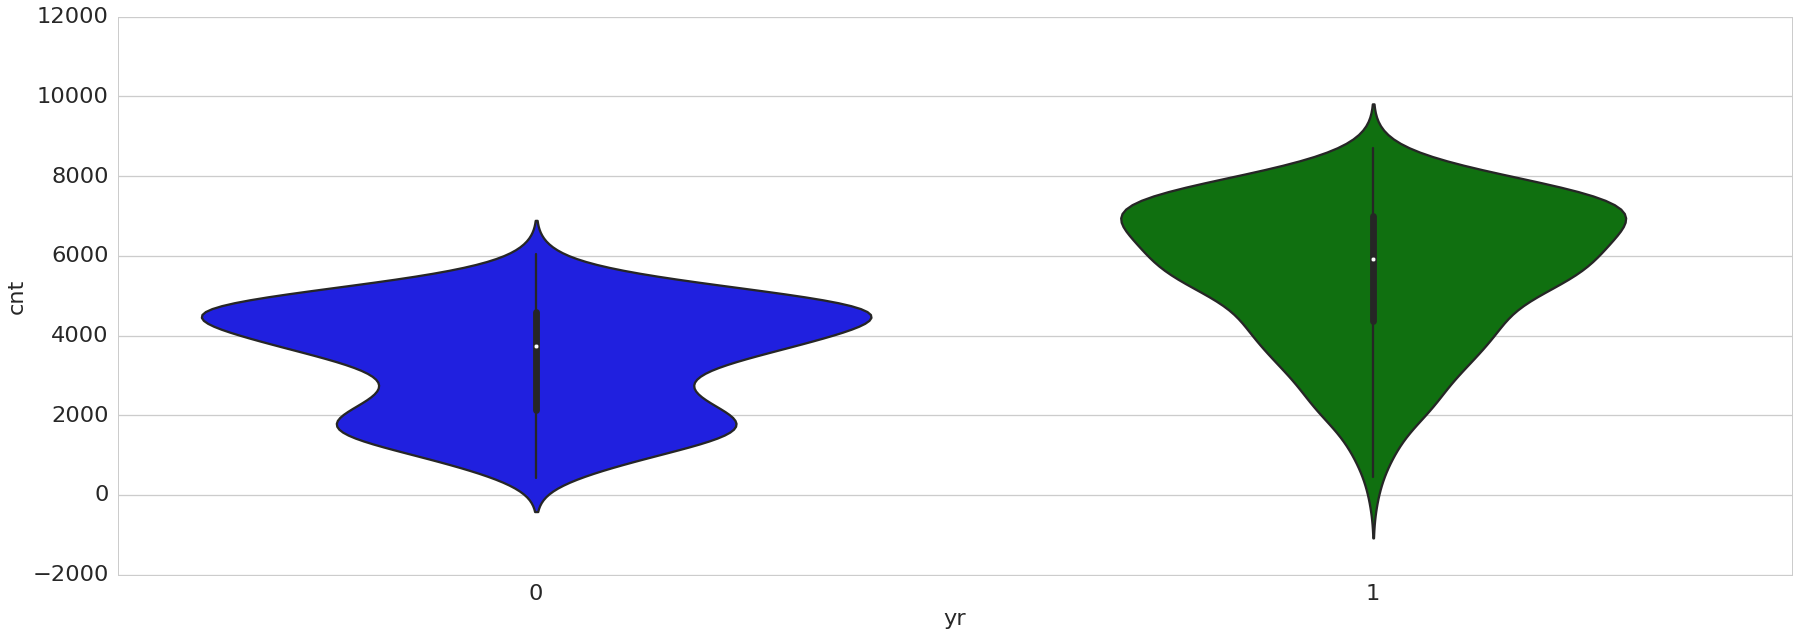

In [13]:
sn.violinplot(data=train[['yr', 'cnt']], 
             x='yr', y='cnt')

两年分布差异较大

### 3.2 一年中每天的骑行量

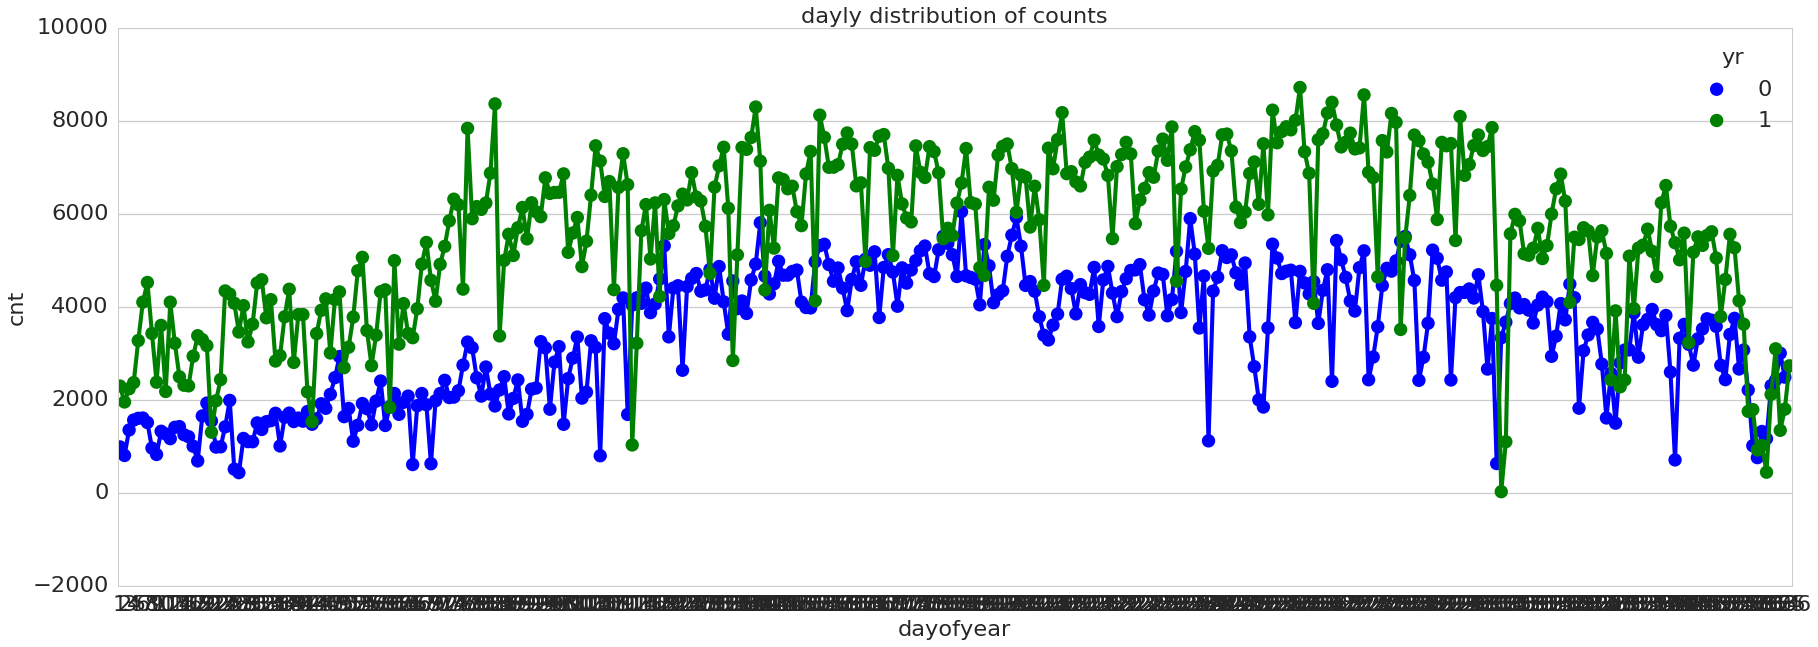

In [15]:
import datetime
train['date'] = pd.to_datetime(train['dteday']) # 转换为日期类型
train['dayofyear'] = train['date'].dt.dayofyear # 减今年的第几天

fig, ax = plt.subplots() # 建立分布图
sn.pointplot(data=train[['dayofyear', # 数据是 dayofyear/cnt/yr三个特征
                        'cnt',
                        'yr']],
            x='dayofyear', y='cnt',# 横坐标是日期,纵坐标是cnt
            hue='yr', ax=ax) # 不同年份
ax.set(title='dayly distribution of counts')

从上图看,开始和结尾日期骑行量少,应该和季节/月份有关

### 3.3 季节和骑车数量关系

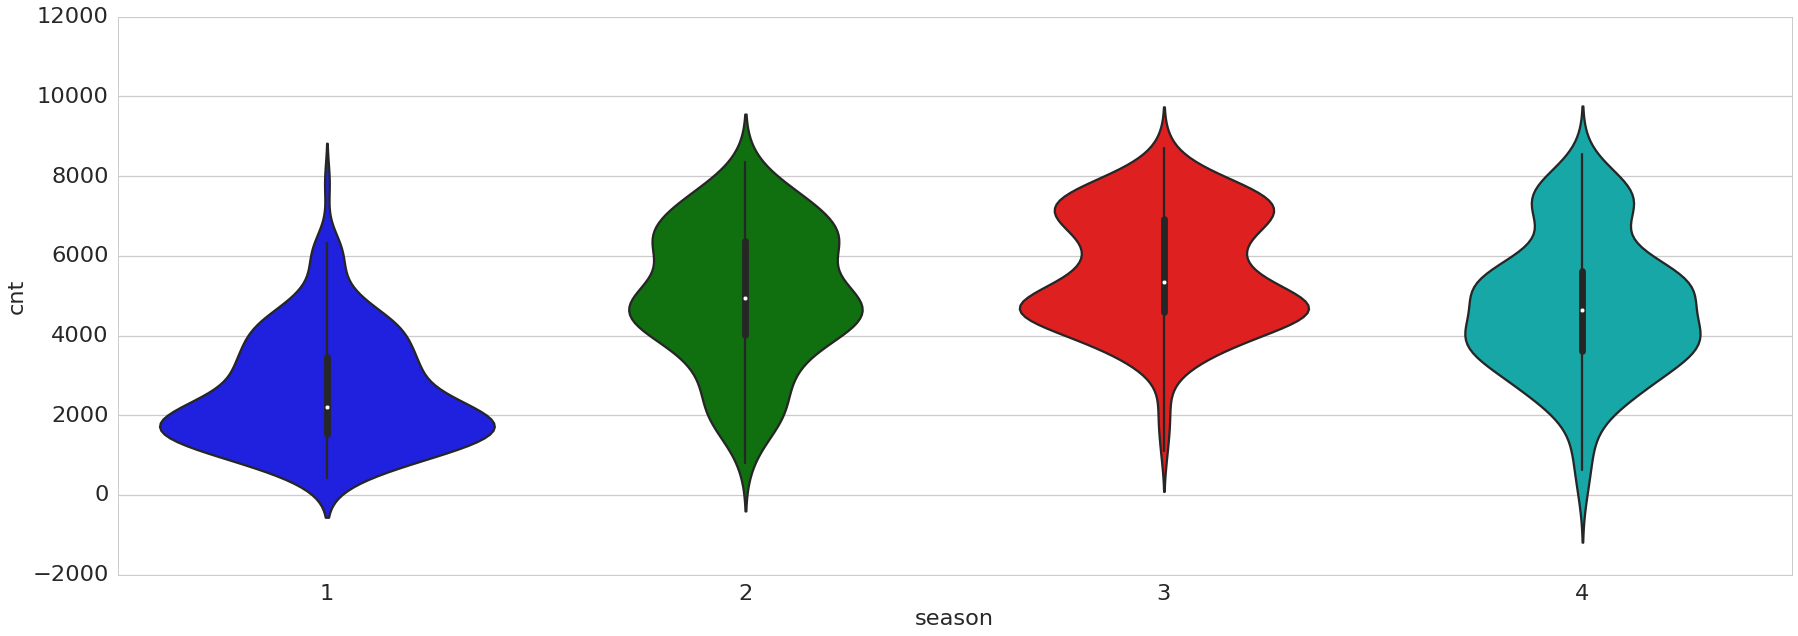

In [18]:
sn.violinplot(data=train[['season',
                    'cnt']],
             x='season',y='cnt')

各季节分布不同.

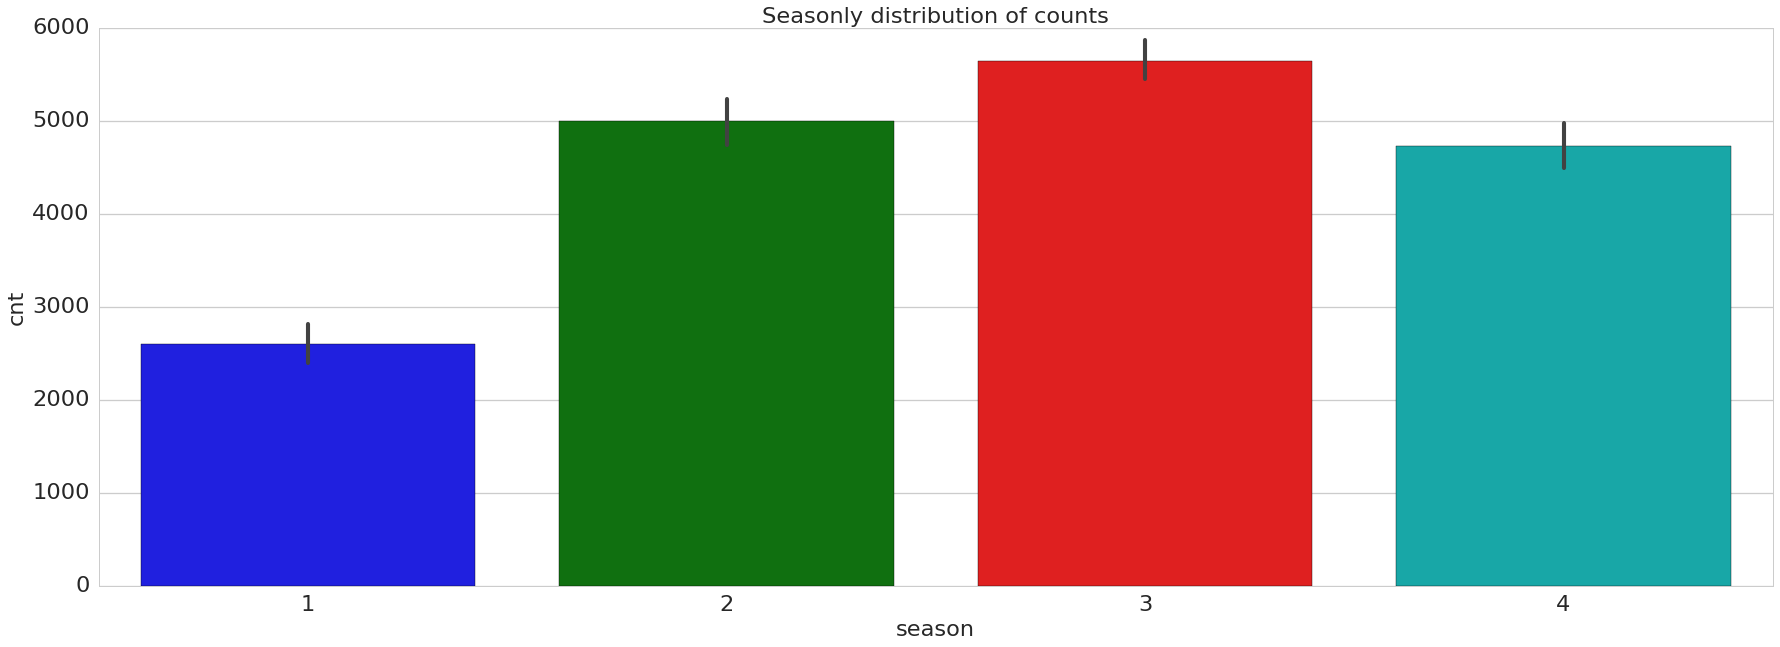

In [19]:
fig, ax = plt.subplots()
sn.barplot(data=train[[
    'season',
    'cnt']],
          x='season', y='cnt')
ax.set(title='Seasonly distribution of counts')

#### 3.4 月份与骑车数量的关系

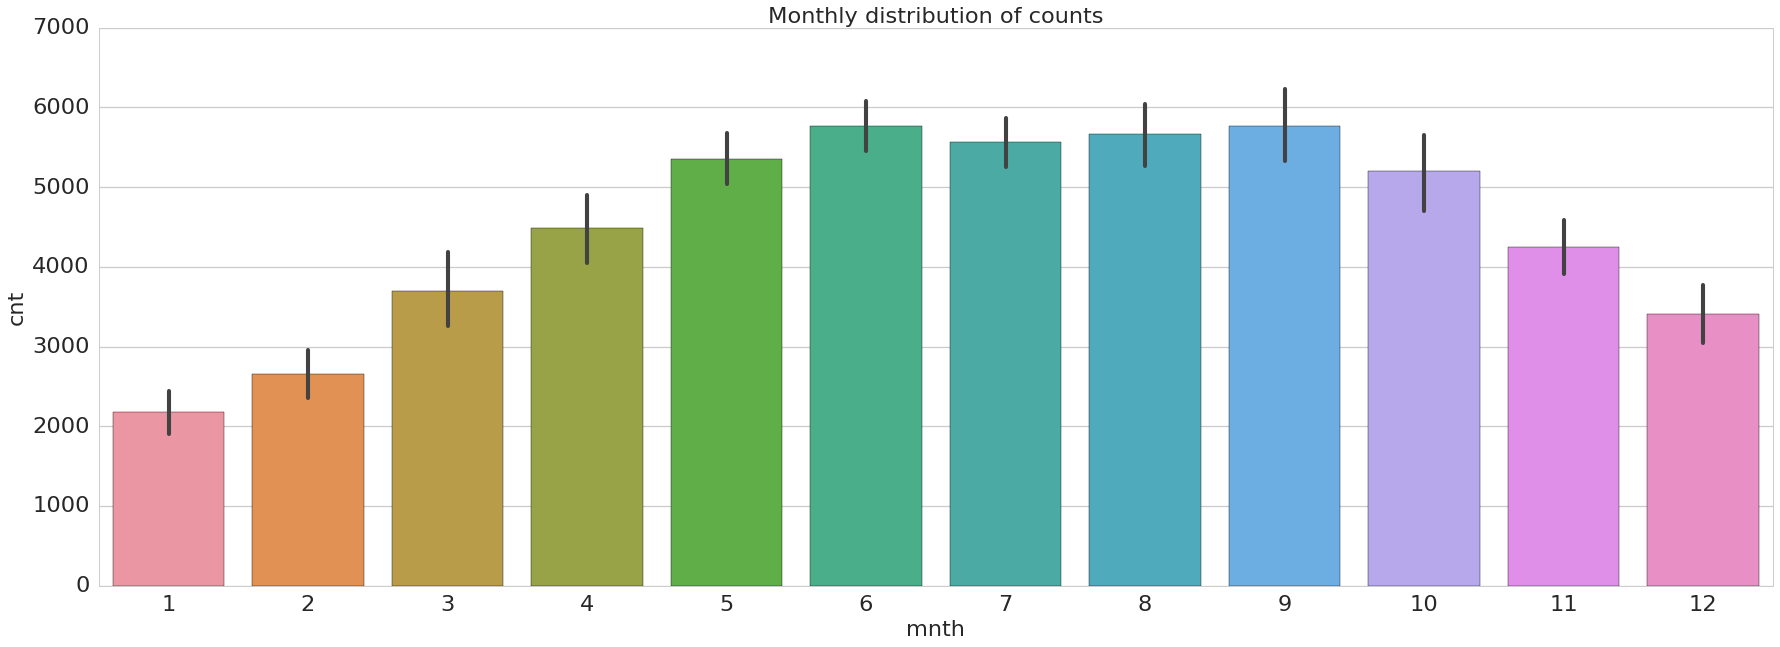

In [21]:
fig, ax = plt.subplots()
sn.barplot(data=train[['mnth',
                     'cnt']],
          x='mnth',y='cnt')
ax.set(title='Monthly distribution of counts')

In [22]:
### 3.5 天气和骑车数量

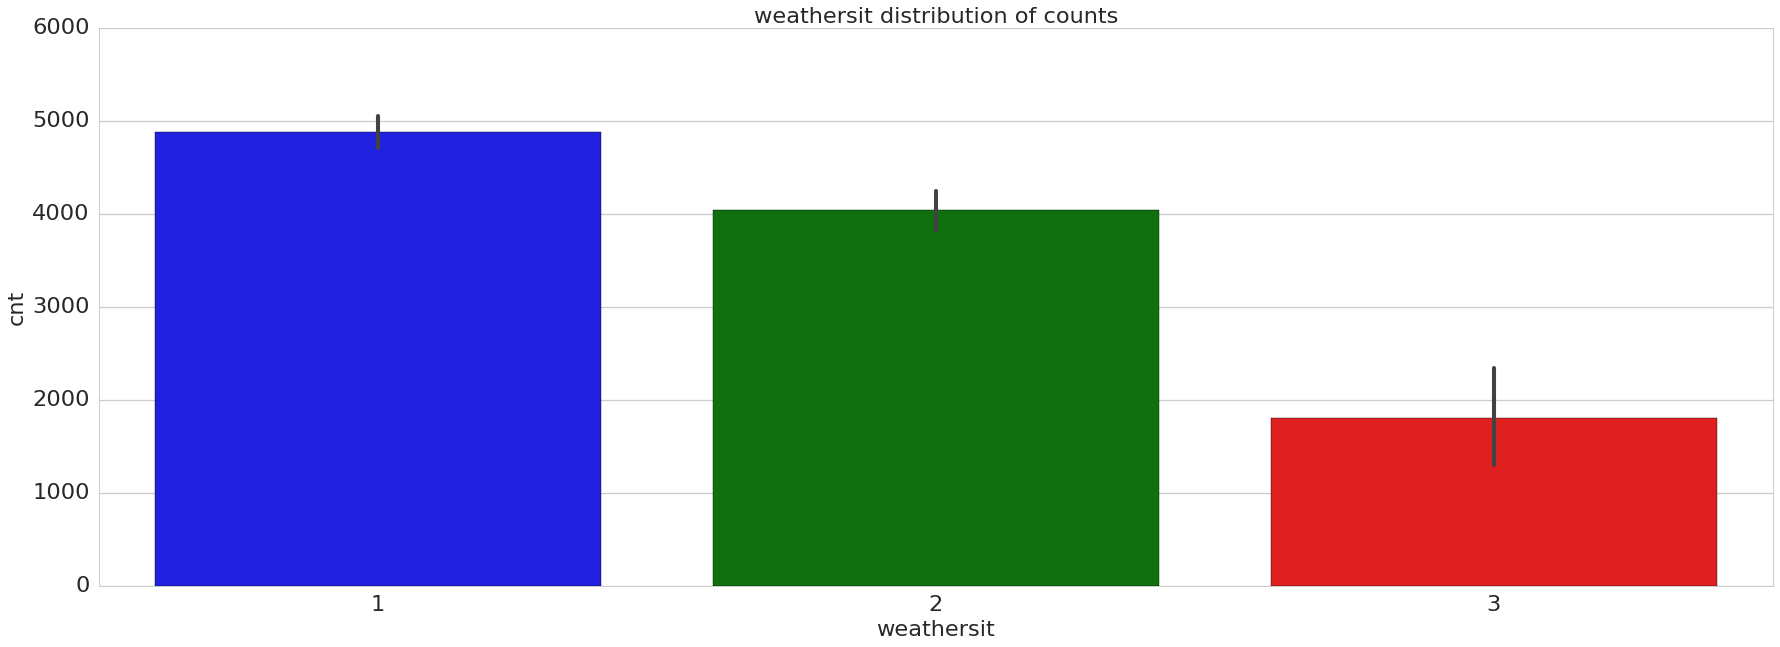

In [23]:
fig, ax = plt.subplots()
sn.barplot(data=train[['weathersit',
                      'cnt']],
          x='weathersit', y='cnt')
ax.set(title='weathersit distribution of counts')


### 3.6 工作日和节假日分布

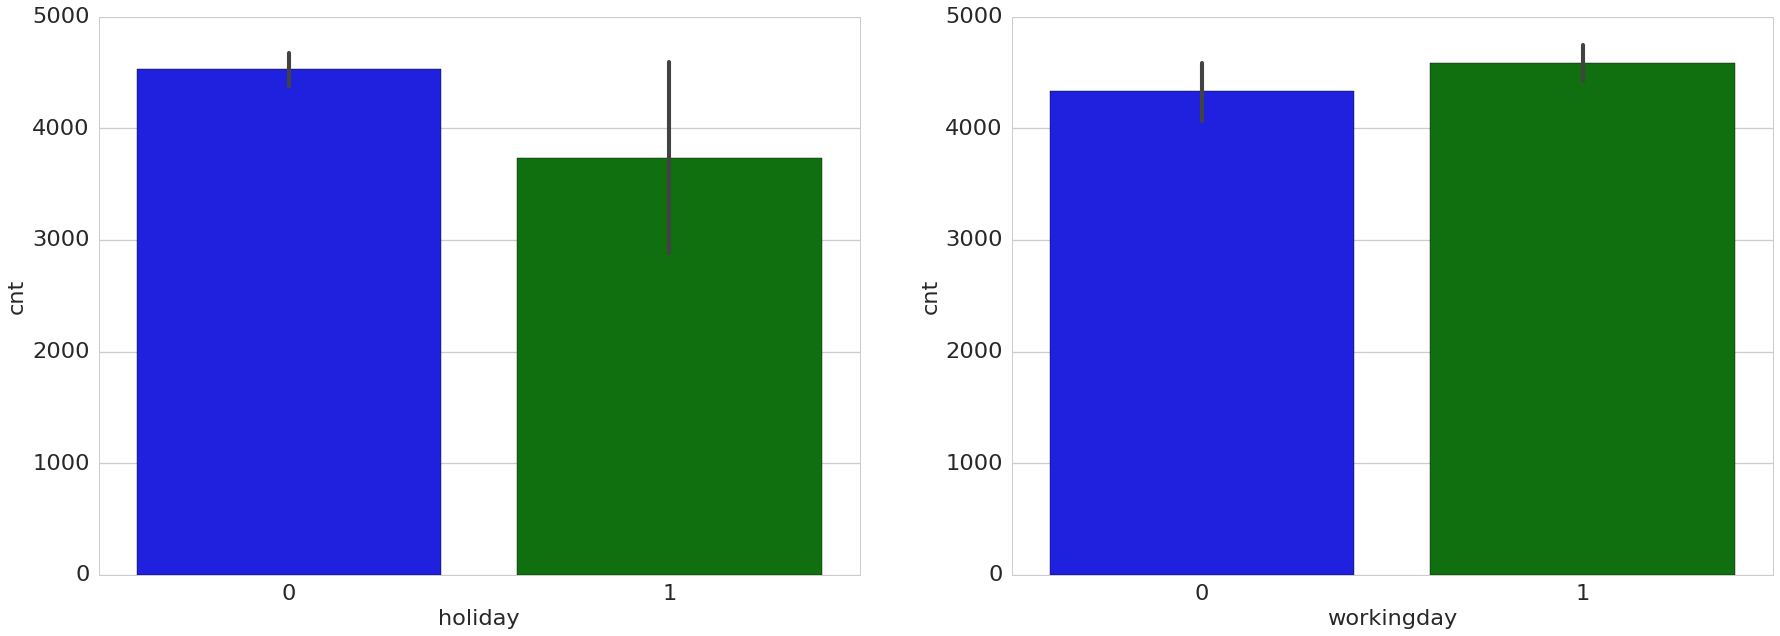

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sn.barplot(data=train, x='holiday',y='cnt',ax=ax1)
sn.barplot(data=train, x='workingday',y='cnt',ax=ax2)

#### 3.7 数值型特征和y之间的相关性

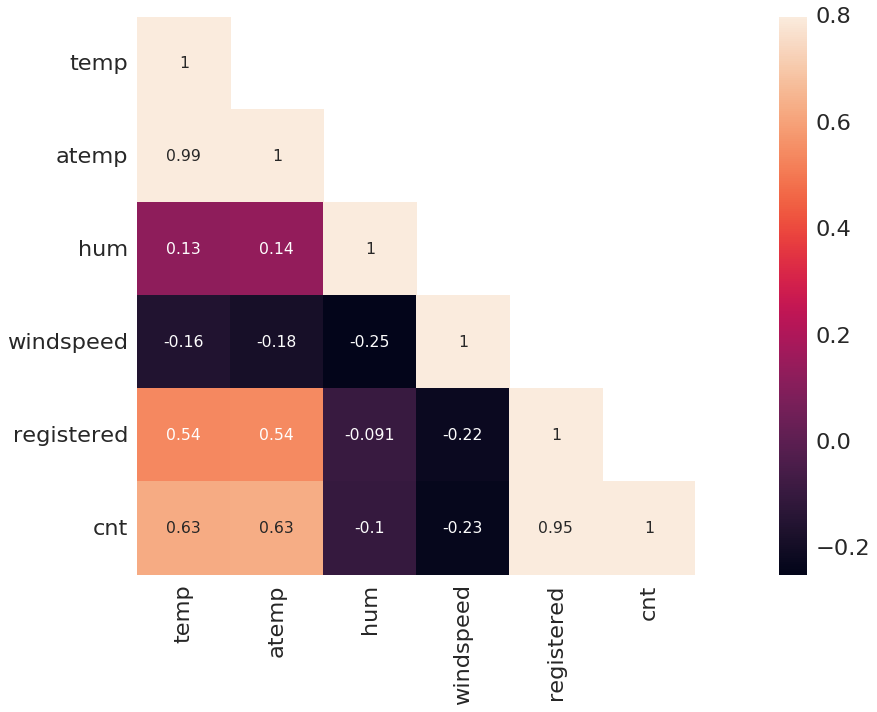

In [29]:
corrMatt = train[['temp','atemp',
                  'hum','windspeed',
                  'registered',
                  'cnt']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
          vmax=.8, square=True,annot=True)